#Diagnosing Heart Disease with AI: Deploying our Model

Today, we'll explore how to improve our model - and **deploy it to a Streamlit site** so that people can use it to make diagnoses.

#Re-Creating Our Model

Our first step will be to train a **Decision Tree machine learning model** like we did last time.

In [1]:
#@title Run this to load our tools and data!

#Check out this post for more details! https://www.kaggle.com/ronitf/heart-disease-uci/discussion/105877

import pandas as pd   # Great for tables (google spreadsheets, microsoft excel, csv).
import os # Good for navigating your computer's files
import gdown
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from joblib import dump, load

import warnings
warnings.filterwarnings("ignore")
!pip install protobuf==4.21.1 > /dev/null 2>&1
!pip -q install streamlit > /dev/null 2>&1
!pip -q install pyngrok > /dev/null 2>&1
from pyngrok import ngrok

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Pioneers/Heart%20Disease/heart.csv"
patient_data = pd.read_csv("heart.csv")
patient_data = patient_data[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'target']]
column_names = {'age':'age','sex':'sex','cp':'chest_pain', 'trestbps':'blood_pressure','chol':'cholesterol','fbs':'high_blood_sugar','thalach':'heart_rate','exang':'exercise_pain','target':'disease'}
patient_data = patient_data.rename(column_names,axis=1)
patient_data['chest_pain'] = (patient_data['chest_pain'] > 0).astype(int) #1 for yes, 0 for no
patient_data['disease'] = 1 - patient_data['disease'] #1 for yes, 0 for no
patient_data = patient_data[['age', 'blood_pressure',  'cholesterol', 'heart_rate', 'sex', 'high_blood_sugar', 'chest_pain', 'exercise_pain', 'disease']]

def show_predictions(predictions, feature = None):
  if feature:
    feature.append('disease')
    df = patient_data[feature].copy()
  else:
    df = patient_data[['disease']].copy()
  df['prediction'] = predictions
  print ("Percent accurate:", accuracy_score(patient_data['disease'], predictions))
  display(df)

def visualize_tree(model, input_data):
  fig_size = min(model.max_depth * 2, 40)
  fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (fig_size,fig_size), dpi=800)
  tree.plot_tree(model,
                class_names=['healthy (no disease)', 'sick (disease)'],
                feature_names = input_data.columns,
                filled = True,
                impurity = False)

def launch_website():
  print ("Click this link to try your web app:")
  if (ngrok.get_tunnels() != None):
    ngrok.kill()
  tunnel = ngrok.connect() # The URL to connect to
  print (tunnel.public_url)
  !streamlit run --server.port 80 app.py >/dev/null # Connect to the URL through Port 80 (>/dev/null hides outputs)

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      


<font color=SlateGrey><h2><b>
Your instructor will guide you through setting up ngrok accounts and getting authtokens using [these](https://drive.google.com/file/d/12zwuOuKh91VSHIHS-6S4ADF4HLC2wKJq/view?usp=sharing) instructions!
</b></h2></font>

<font color=DarkGray><h3><b>
Paste your authtoken below next to `!ngrok authtoken`!
</b></h3></font>

In [2]:
!ngrok authtoken 2jJ9z7Doq4rzGVDqZIxo4Nz2fYp_37jgtS376d6riGc2QVTVR

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


Please **copy over each step from the last notebook!** We'll start by using **two input features**: `blood_pressure` and `heart_rate`.

Use any `max_depth` you like.

Percent accurate: 0.7887788778877888


,disease,prediction
0,0,1
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
298,1,1
299,1,0
300,1,1
301,1,1


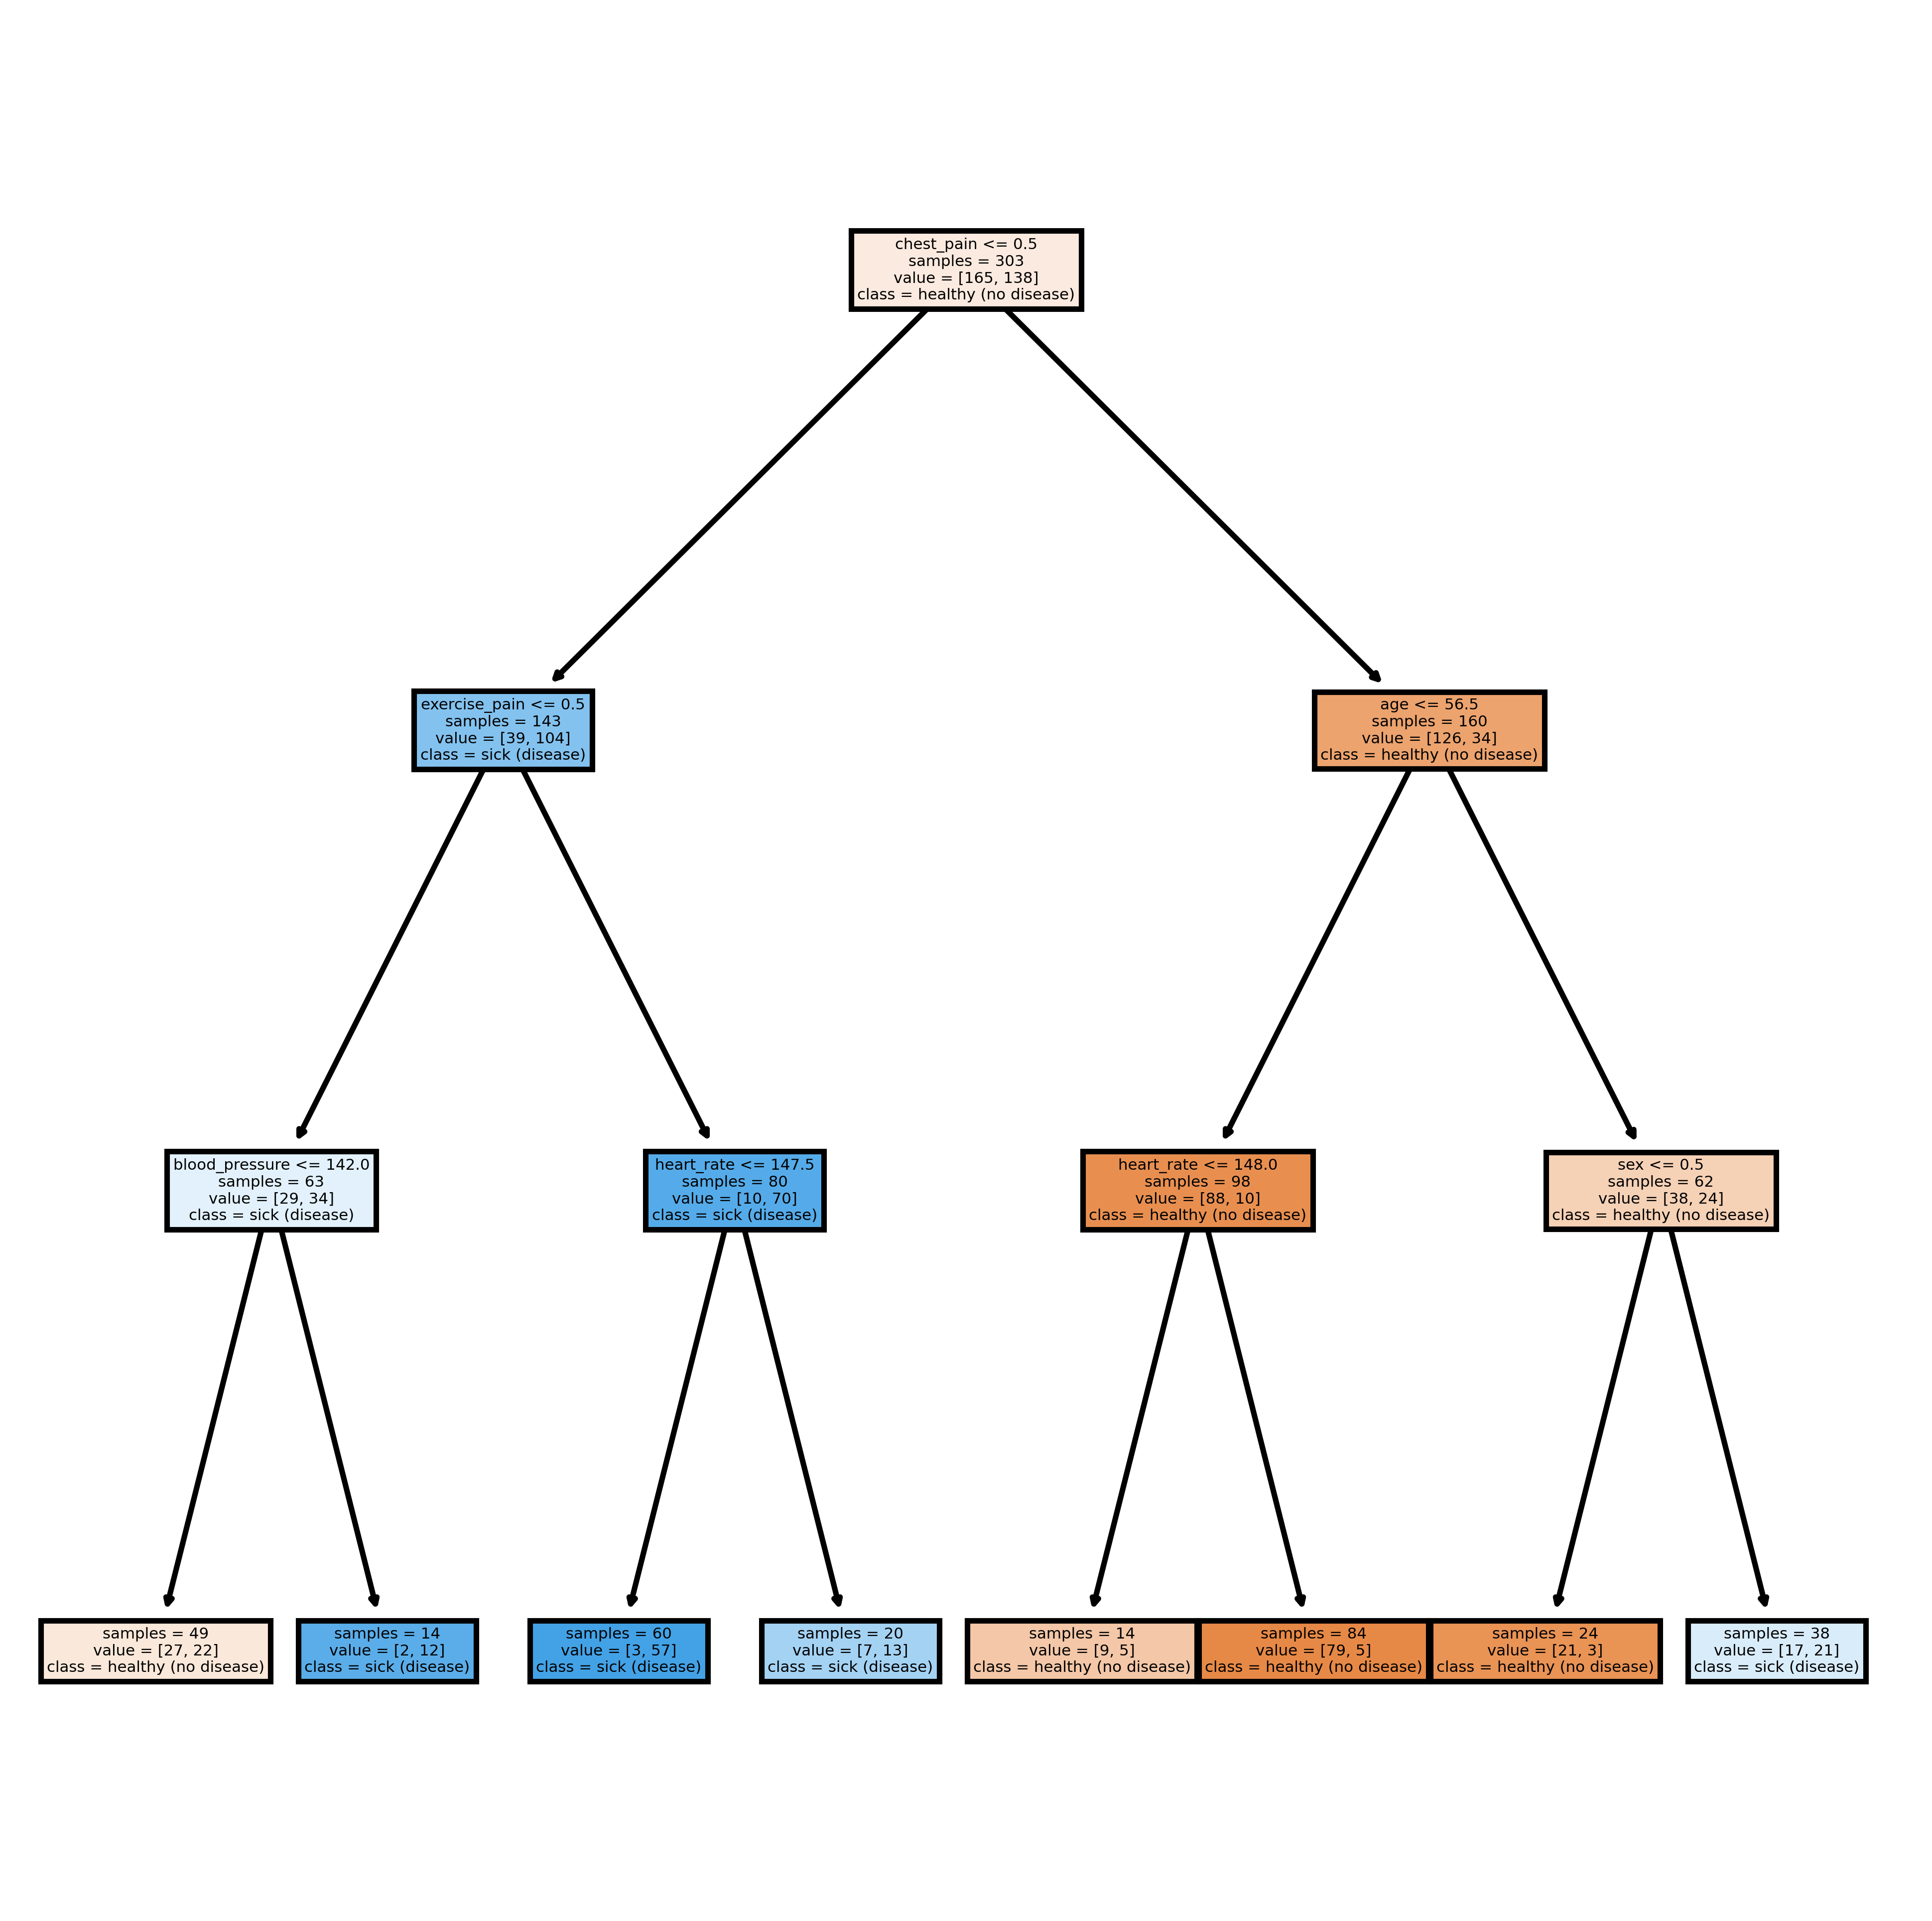

In [3]:
# STEP 1: Prepare your data
features = ['age', 'blood_pressure',  'cholesterol', 'heart_rate', 'sex', 'high_blood_sugar', 'chest_pain', 'exercise_pain']
input_data = patient_data[features]
output_data = patient_data['disease'] # FILL ME IN


# STEP 2: Prepare your model
# YOUR CODE HERE (1 line)
tree_model = DecisionTreeClassifier(max_depth = 3)
# STEP 3: Train your model
# YOUR CODE HERE (1 line)
tree_model.fit(input_data, output_data)

# STEP 4: Make and show predictions
# YOUR CODE HERE (2 lines)

predictions = tree_model.predict(input_data)
show_predictions(predictions)

# STEP 5: Visualize your tree
# YOUR CODE HERE (1 line)
visualize_tree(tree_model, input_data)

Congratulations - you've re-trained your model!


# Making Individual Predictions

How would we use our model to make predictions for an **individual**?

We'll need to feed in data that looks like a row of `input_data`:

In [4]:
input_data.head(1)

,age,blood_pressure,cholesterol,heart_rate,sex,high_blood_sugar,chest_pain,exercise_pain
0,63,145,233,150,1,1,1,0


We can do that with a `list`! Please **fill in values below.**

In [5]:
age = 78 # FILL IN A NUMBER
blood_pressure = 75 # FILL IN A NUMBER
cholesterol = 216 # FILL IN A NUMBER
heart_rate = 146 # FILL IN A NUMBER
sex = 1 # FILL IN A NUMBER
high_blood_sugar = 1 # FILL IN A NUMBER
chest_pain = 1 # FILL IN A NUMBER
exercise_pain = 1 # FILL IN A NUMBER
input_features = [[age, blood_pressure, cholesterol, heart_rate, sex, high_blood_sugar, chest_pain, exercise_pain]]
print ("This patient's features:", input_features)

This patient's features: [[78, 75, 216, 146, 1, 1, 1, 1]]


Now, we can use `tree_model.predict` with the `input_features` to make a prediction! Try it below:

In [6]:
prediction = tree_model.predict(input_features) # YOUR CODE HERE (1 line)
print ("This patient's diagnosis:", prediction) # You may get a UserWarning error. That's okay!

This patient's diagnosis: [1]


**Discuss: How do we interpret the prediction?** Experiment with changing the features to get an output of 0 or 1.

On our website, we'll **ask the user to enter values** and then **make a prediction!**

#Deploying to a Web App

We're ready to build a web app for our model!

First, we're going to **save our model by "dumping" it to a file.**

In [8]:
dump(tree_model, "model.joblib")

['model.joblib']

### Customizing your Streamlit App

Let's set up the header of our app by adding a title, name, and description! We'll use a nifty Colab command, `%%writefile`, to write code directly to a Python file: `header.py`.
To customize your website using Streamlit, we recommend using functions like ```st.title()```, ```st.header()```, and ```st.subheader()```, and ```st.write()```.

1. First, let's set up the title of your Heart Disease Classifier AI.

2. Next, write your name under the title. You can also use a fake name or alias if you prefer.

3. Now, write a description outlining about who this AI model would be useful for and what it can do!

Finish the `create_header()` function below!

In [7]:
%%writefile header.py
import streamlit as st

def create_header():
  st.title("Heart Disease Tracker")     # YOUR CODE HERE
  st.header("Please write your heart rate, blood pressure, etc.")    # YOUR CODE HERE
  st.subheader("SEAN EOM") # YOUR CODE HERE

Writing header.py


## Get the User's Features
Below, you'll use `st.number_input()` to ask the users to enter the features you need.</b>
For example, you could ask:

>`dizziness = st.number_input("Do you experience dizziness? Enter 1 for yes, 0 for no.")`

Your `get_user_input()` will return your `input_features` in a list like so:
>`[[feature_1, feature2]]`

Make sure to ask about all the input features your model uses!





In [9]:
%%writefile userinput.py
import streamlit as st

def get_user_input():
  age = st.number_input("What is your age?")
  blood_pressure = st.number_input("What is your blood pressure?")
  chloseterol = st.number_input("What is your cholesterol?")
  heart_rate = st.number_input("What is your maximum heart rate")
  sex = st.number_input("What is your sex?")
  high_blood_sugar = st.number_input("Do you have high blood sugar?")
  chest_pain = st.number_input("Do you have chest pain?")
  exercise_pain = st.number_input("Do you have exercise pain?")
  input_features = [[blood_pressure, heart_rate]] # put your features in here!
  return input_features

Writing userinput.py


## Make a Prediction
Now that you have your user inputs, you'll have to give them to your model so it can **make a prediction**.

Fill in the code below!



In [10]:
%%writefile predictor.py

def make_prediction(model, input_features):
  return model.predict(input_features) # Fill this in!

Writing predictor.py


## Output Your Prediction
Finally, use `st.write()` instead of `print` to tell the user their results!

(Hint: How do we interpret the output of our model's predictions?)

In [11]:
%%writefile response.py
import streamlit as st

def get_app_response(prediction):
  if prediction == 1: # CHANGE THIS!
    st.write("The model predicts that you have a heart disease")
  # ADD MORE IF / ELIF STATEMENTS HERE
  else:
    st.write("The model predicts that you don't have a heart disease")

Writing response.py


## Put everything all together!
Run the cell below to put everything we've coded together on our web app!

In [12]:
%%writefile app.py
import streamlit as st
from joblib import load

# Imports the functions we coded above
from header import *
from userinput import *
from response import *
from predictor import *

# Load our DecisionTree model into our web app
model = load("model.joblib")
st.write ("Model uploaded!") # You may remove this in your finalized web app!

create_header()
input_features = get_user_input()
prediction = make_prediction(model, input_features)
get_app_response(prediction)


Writing app.py


## Test Your Website

Once you've got all these steps, test out your website! Does it work as expected? Do the results match the decision tree you printed out?

**Congratulations** on building your machine-learning-powered web app!

In [ ]:
launch_website()

Click this link to try your web app:
https://f7d3-34-74-71-147.ngrok-free.app
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
2024-07-17 00:37:13.926 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 589, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 16, in <module>
    prediction = make_prediction(model, input_features)
  File "/content/predictor.py", line 3, in make_prediction
    return model.predict(input_features) # Fill this in!
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 426, in predict
    X = self._validate_X_predict(X, check_input)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 392, in _validate_X_predict
    X = self._validate_data(

# Improve Your Website

Now's your chance to **make your web app as useful as possible.** Explore these directions!

The [**Streamlit Cheat Sheet**](https://discuss.streamlit.io/t/streamlit-cheat-sheet/4912) is a very useful resource.

##Adding Information

What should your user know about:
- How this model was created?
- What data you used?
- How accurate your model is?
- How your model works?
- Anything else?

Add text with `st.write`!

You can also try **uploading the image of the tree** to your site to explain how your model works.


## Improving Input
Make it easier for the user to provide input!


*   Have you explained the units and all the information the user needs?
*   Can you use a slider, buttons, or another way for a user to enter their data?



## Improving Your Model
Improve your model using any of the techniques from last time! Are there any other combinations of input features that perform better than `blood_pressure` and `heart_rate`?

As an extra challenge, try exploring [different classification algorithms](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) instead of decision trees. [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier) is a particularly useful technique - a random forest uses a whole bunch of decision trees that "vote"!